In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
print("TensorFlow version:", tf.__version__)
print("CUDA available:", tf.test.is_built_with_cuda())
print("GPU devices:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.0
CUDA available: True
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import os  
root_path = os.getcwd()
train_path = r"C:\Users\User\Desktop\deep_learning\cats_and_dogs_filtered\train"
val_path = r"C:\Users\User\Desktop\deep_learning\cats_and_dogs_filtered\validation"


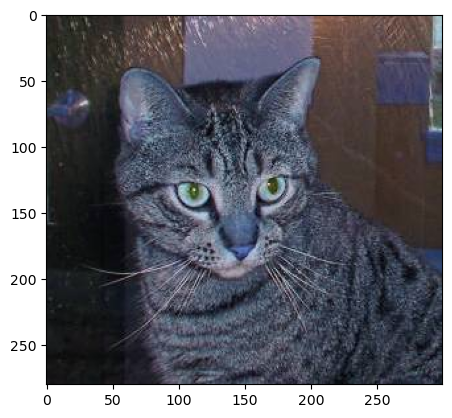

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread(r"C:\Users\User\Desktop\deep_learning\cats_and_dogs_filtered\train\cats\cat.1.jpg")
plt.imshow(img)

In [6]:
input_size = (64,64)
input_shape = (64,64,3)

def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,input_size)
    return img

In [7]:


def load_dataset(val_path : str):

    cur_x,cur_y =[],[]
    for cur_class in os.listdir(val_path):
        label = ""
        if cur_class == "cats":
            label =[1,0]
        else:
            label =[0,1]
        for filename in os.listdir(val_path+"/"+cur_class):
            img_path = val_path+"/"+cur_class+"/"+filename
            img =load_img(img_path)
            cur_x.append(img)
            cur_y.append(label)
    return np.array(cur_x),np.array(cur_y)


In [8]:
x_train, y_train = load_dataset(train_path)
x_val, y_val = load_dataset(val_path)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)

x_train :  (2000, 64, 64, 3)
y_train :  (2000, 2)


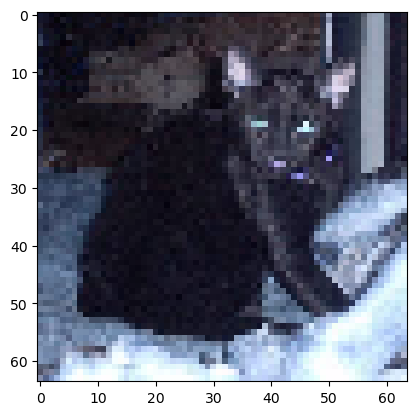

In [9]:
index =5

plt.imshow(x_val[index])

In [10]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Conv Layer 1
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 1
    Conv2D(64, (3, 3), activation='relu'),                          # Conv Layer 2
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 2
    Flatten(),                                                      # Flatten Layer
    Dense(128, activation='relu'),                                  # Fully Connected Layer
    Dense(2, activation='softmax')      
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer =Adam(),
              metrics = ['accuracy'])


In [16]:
history = model.fit(
    x=x_train,
    y= y_train,
    validation_data = (x_val,y_val),
    batch_size = 16,
    epochs = 10,
    verbose =1
)

Epoch 1/10
125/125 [==============================] - 52s 13ms/step - loss: 7.7190 - accuracy: 0.5075 - val_loss: 0.6963 - val_accuracy: 0.5060
Epoch 2/10
125/125 [==============================] - 1s 10ms/step - loss: 0.6558 - accuracy: 0.5790 - val_loss: 0.7637 - val_accuracy: 0.4960
Epoch 3/10
125/125 [==============================] - 1s 10ms/step - loss: 0.6139 - accuracy: 0.6100 - val_loss: 0.8106 - val_accuracy: 0.5280
Epoch 4/10
125/125 [==============================] - 1s 10ms/step - loss: 0.5709 - accuracy: 0.6540 - val_loss: 0.7634 - val_accuracy: 0.5030
Epoch 5/10
125/125 [==============================] - 1s 11ms/step - loss: 0.5477 - accuracy: 0.6835 - val_loss: 0.8804 - val_accuracy: 0.5230
Epoch 6/10
125/125 [==============================] - 1s 10ms/step - loss: 0.4819 - accuracy: 0.7330 - val_loss: 1.0845 - val_accuracy: 0.5470
Epoch 7/10
125/125 [==============================] - 1s 9ms/step - loss: 0.5005 - accuracy: 0.7265 - val_loss: 1.0452 - val_accuracy: 0.5420

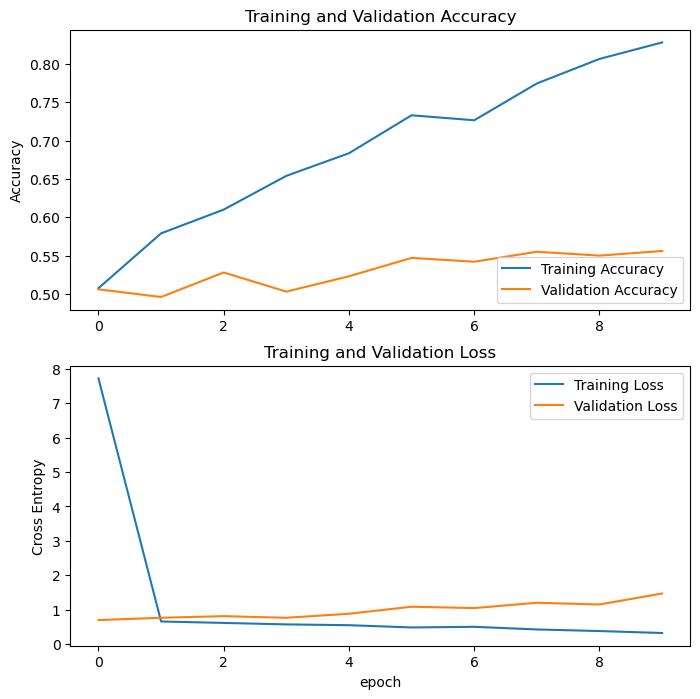

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

[1 0]
cats
(1, 64, 64, 3)
1/1 [==============================] - 0s 19ms/step
_pred : [[0.5294042  0.47059578]]
_pred class:  cats


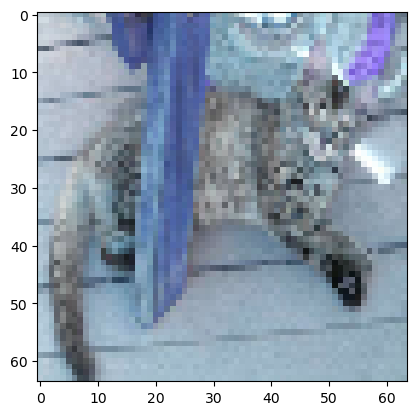

In [ ]:
index = 10
test_label = y_val[index]
test_img = x_val[index]

labels = ["cats","dogs"]
print(test_label)
print(labels[np.argmax(test_label)])
plt.imshow(test_img)

sample_img = np.array([test_img])
print(sample_img.shape)

_pred = model.predict(sample_img)
print("_pred :",_pred)
print("_pred class: ",labels[np.argmax(_pred)])